
## 1. Train DATA Review
  -  PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
  -  총 11 Columns (Parameter) 존재하고, 각 parameter별 891-endtries 존재
  -  결측치는 각각 Age: 177, Cabin: 687, Embarked: 2 존재
  -  결측치 처리를 drop했을 때 Accuracy는 0.75 under로 accuracy를 올리는데 한계가 있음.
  -  ==> 결측치 처리는: Age는 Mean, Cabin: "N", Embarked: 3개의 항구 중 가장 많은 항으로 assign.
  - "Sex" (Female/Male), "Embarked" (C/Q/S: Cherbourg/Queenstown/Southampton 항구에서 탑승한 승객), "Cabin" (A~G, N, T)을 제외한 모든 Parameter들은 Numerical Data
       1차적으로는 별다른 처리 필요치 않음

## 2. 각 Parameter별 결측 치 처리 & 특성 분석 및 data 가공
  - Age는 Mean, Cabin: "N", Embarked: 3개의 항구 중 가장 많은 항으로 assign.
  - 각 parameter별 data 가공
	  - (1) 'SEX' : 남녀 성별에 따른 차이가 심함: 분류 예측 모델의 Key parameter, 남성일 수록 생존율이 낮고, 여성일 수록 생존율이 높음. Female: 1, Male: 0 로 Encoding

	  - (2) 'Cabin':  생존율과 상관성 높고, Cabin의 preFix: C를 제외하고는 Fare와도 상관관계 있음. Cabin의 첫글자로만 classification ==> ENCODING 필요 Cabin assign되어 있고 없고에 따른 생존율 차이 큼: 0.30 vs. 0.70 ==> "IsCabin" 추가

	  - (3) 'Embarked': Cherbourg - Queenstown - Southampton 순으로 생존율이 높음
	     ==> 항구 도시마다 탑승자들의 경제력/교육.. 등의 차이가 있을 것으로 예상됨
	    다만, Q/S는 생존율과 Fare간 상관 관계가 일치 하지는 않음
	    ==> 'C','Q','S'를 각각 1, 0.5, 0 로 Encoding

	  - (4) "Name"
	     이름으로부터 백작/백작부인, Master/Major/Captain/... 등의 사회적 지위를 알 수 있음
 	     특히 Sir/Countess/Ms/MMe/Lady/MLLedml 경우 생존율이 100%에 이름. 		아래와 같은 로직으로 encoding
	      	if x=="Sir" or x=="Countess" or x=="Ms" or x=="Mme" or x=="Lady" or x=="Mlle" ==> 7
	      	elif x=="Mrs": return 6
 		elif x=="Miss": return 5
 		elif x=="Master": return 4
		elif x=="Col" or x=="Major": return 3
		elif x=="Dr":  return 2
		elif x=="Mr":  return 1
		else: return 0

	  - (5) "SibSp", "Parch": 남매/배우자, 부모/자녀
	    모든 가족 구성원 합산 수에 따른 생존율로 변환
       - 가족 수 3~4명일 때 생존율이 가장 높음.
       - Age와 연계했을 때 아이들/노부모들을 동반한 가족들의 경우 배려를 받았을 것이고, 가족들 스스로도 가족을 지키기 위해 생존 확률이 높은 방향으로 행동했을 가능성이 높음. 상대적으로 너무 많은 가족이 있을 경우 너무 많은 인원이 생존 활동에 오히려 제약으로 작용했을 것으로 예상됨
	    ==> CompactFmly 파생 변수

	  - (6) Fare: 0,30,100,600 구간으로 encoding

	  - (7) PClass: 객실의 클래스에 따라 생존율과 깊은 상관관계 갖음
          여성이면서 PClass가 높을 수록 생존율이 높아짐
 	     ==> Gender_Class 조합 새로운 파생 변수 추가 6~1로 encoding

	  - (8) Age: 연령대가 아주 낮은 아이들과 노년의 탑승객의 경우 생존율이 상대적으로 높음. 남/여 gender에 따른 생존율과 마찬가지로 남성/중장년층일수록 약자 보호/배려에 따른 결과로 보임
      

## 3. 생존율과의 상관 관계
  - Target Parameter인 생존율에는 여성이면서 그리고 연령대가 아주 어리거나 아주 고령일 수록, 그리고 가족 구성원이 3~4명으로 compact할 수록 생존율이 높고, 상위 경제력을 가져 배 운임이 높은 calss일수록 생존율이 높은데..경제력 순으로 탈출 했다기 보다는 배운임이 높을 수록 뷰가 좋은 고층에 배치되었을 것이고, 이러한 이유로 인해 배가 침몰할 당시 상위층에 있을 수록 빠져나오는데 유리하고 시간도 충분히 벌 수 있기 때문인것으로 보인다.

# 분류 예측 모델 Key Point & Remarks

 ### 1. data의 결측치 처리가 1번째 Key Part임: 결측치를 drop했을 때와 mean값/빈번값으로 대체했을 때 accuracy 차이가 크게 나는데. 이러한 처리로 인해 accuracy가 좋아졌다고 진성으로 예측 모델이 좋아졌다고 하기에는 한계가 있음

 ### 2. Key Sensitivity (Correlation)을 가지는 파라미터와 파생 변수를 잘 발굴 해야 정확도 높은 모델을 개발할 수 있음.
 ### 3. 이러한 예측모델은 raw data의 분산도가 변수 선정과 학습에 어려움을 주는데,  Outlier같은 처리가 진성의 모델 정확도를 높이는데 크게 기여할 수 있을 것으로 예측되는데, 본 데이터의 경우 target parameter인 survival rate가 0/1로 Quantized value라 분석이나 outlier 처리 correlation분석에 한계가 있음.



In [687]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [688]:
import pandas as pd
file_path = '/content/drive/MyDrive/00_KITA_2404/M3_분석라이브러리/pandas/dataset/train.csv'
df = pd.read_csv(file_path)
df.set_index('Name',inplace=True)

In [689]:
df2=df.copy()                     ## 나중에 "Cabin"을 쓰기 위해서..
df2.reset_index(inplace=True)
print(df.head())

                                                    PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Alle

In [690]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB
None
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [691]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [692]:
df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [693]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB
None


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Name,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,71.2833,C85,C
"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,53.1000,C123,S
"Allen, Mr. William Henry",0,3,male,35.0,0,0,8.0500,NaN,S


In [694]:
unique_embarked_values = df['Embarked'].unique()
print(unique_embarked_values)
unique_sex_values = df['Sex'].unique()
print(unique_sex_values)

['S' 'C' 'Q' nan]
['male' 'female']


### Embarked
- C: Cherbourg 항구에서 탑승한 승객
- Q: Queenstown 항구에서 탑승한 승객
- S: Southampton 항구에서 탑승한 승객

In [695]:
embarked_survival_rates = df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)
print("생존율이 높은 순서:")
print(embarked_survival_rates)

생존율이 높은 순서:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [696]:
# 결측치 처리
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


### Parameter 1차 가공
1. Parameter: Sex

In [697]:
unique_gender_values = df['Sex'].unique()
print(unique_gender_values)

['male' 'female']


<Axes: xlabel='Sex'>

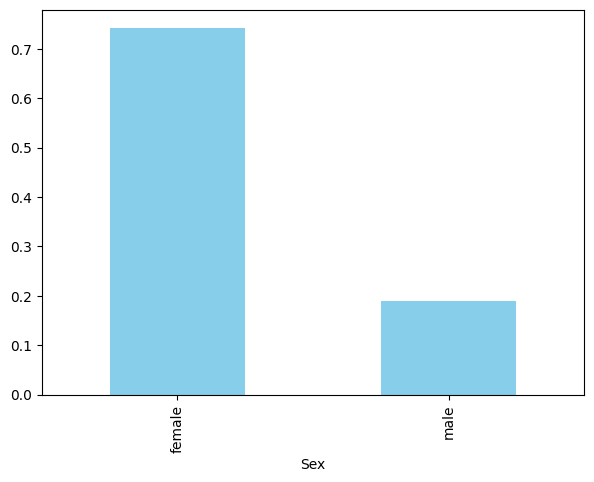

In [698]:
import matplotlib.pyplot as plt
# Fair별 생존율 계산
Sex_survival_rate = df.groupby('Sex')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(7, 5))
Sex_survival_rate.plot(kind='bar', color='skyblue')

In [699]:
df['Sex']=df['Sex'].replace(['female', 'male'], [1,0])

2. Parameter: CABIN

In [700]:
unique_Cabin_values = df['Cabin'].unique()
print(unique_Cabin_values)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [701]:
#### 선실 분류별 data Gathering
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].fillna('N',inplace=True)

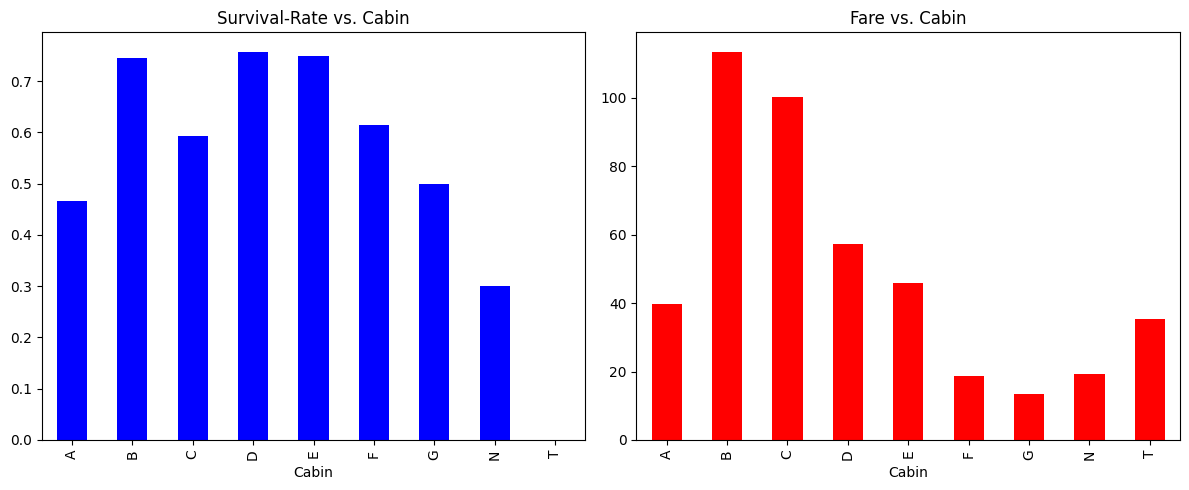

In [702]:
# Cabin별 생존율 계산
Cabin_survival_rate = df.groupby('Cabin')['Survived'].mean()
Cabin_fare = df.groupby('Cabin')['Fare'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
Cabin_survival_rate.plot(kind='bar', color='b')
Cabin_survival_rate
plt.title('Survival-Rate vs. Cabin')
plt.subplot(1, 2, 2)
Cabin_fare.plot(kind='bar', color='r')
plt.title('Fare vs. Cabin')
plt.tight_layout(); plt.show()

IsCabin
0    0.299419
1    0.669951
Name: Survived, dtype: float64


<Axes: xlabel='IsCabin'>

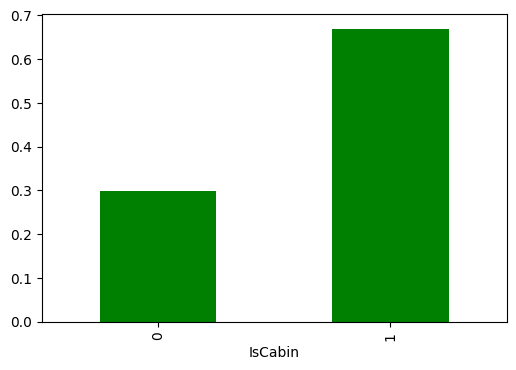

In [703]:
df['IsCabin'] = 1
df.loc[df['Cabin'] == "N", 'IsCabin'] = 0
df.loc[df['Cabin'] == "T", 'IsCabin'] = 0
# Cabin 유무 별 생존율 계산
IsCabin_survival_rate = df.groupby('IsCabin')['Survived'].mean()
print(IsCabin_survival_rate)
# 그래프 그리기
plt.figure(figsize=(6, 4))
IsCabin_survival_rate.plot(kind='bar', color='g')

3. Parameter: Embarked
- C: Cherbourg 항구에서 탑승한 승객
- Q: Queenstown 항구에서 탑승한 승객
- S: Southampton 항구에서 탑승한 승객

In [704]:
unique_Embarked_values = df['Embarked'].unique()
print(unique_Embarked_values)

['S' 'C' 'Q']


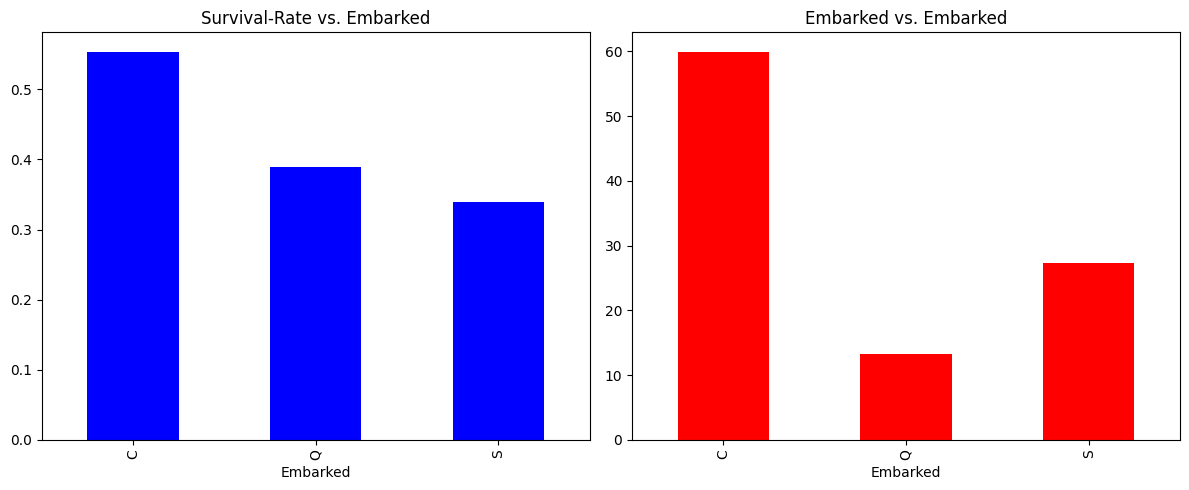

In [705]:
# Cabin별 생존율 계산
Embarked_survival_rate = df.groupby('Embarked')['Survived'].mean()
Embarked_fare = df.groupby('Embarked')['Fare'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
Embarked_survival_rate.plot(kind='bar', color='b')
Embarked_survival_rate
plt.title('Survival-Rate vs. Embarked')
plt.subplot(1, 2, 2)
Embarked_fare.plot(kind='bar', color='r')
plt.title('Embarked vs. Embarked')
plt.tight_layout(); plt.show()

IsCabin
0    0.299419
1    0.669951
Name: Survived, dtype: float64


<Axes: xlabel='IsCabin'>

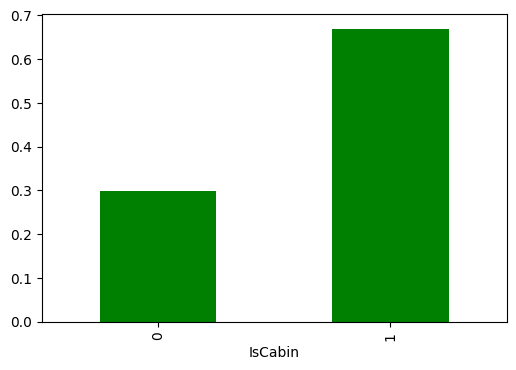

In [706]:
df['IsCabin'] = 1
df.loc[df['Cabin'] == "N", 'IsCabin'] = 0
df.loc[df['Cabin'] == "T", 'IsCabin'] = 0
# Cabin 유무 별 생존율 계산
IsCabin_survival_rate = df.groupby('IsCabin')['Survived'].mean()
print(IsCabin_survival_rate)
# 그래프 그리기
plt.figure(figsize=(6, 4))
IsCabin_survival_rate.plot(kind='bar', color='g')

In [707]:
df['Embarked']=df['Embarked'].replace(['C','Q','S'], [1,0.5,0])
df.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsCabin
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,0,22.000000,1,0,7.2500,N,0.0,0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,1,38.000000,1,0,71.2833,C,1.0,1
"Heikkinen, Miss. Laina",1,3,1,26.000000,0,0,7.9250,N,0.0,0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,35.000000,1,0,53.1000,C,0.0,1
"Allen, Mr. William Henry",0,3,0,35.000000,0,0,8.0500,N,0.0,0
"Moran, Mr. James",0,3,0,29.699118,0,0,8.4583,N,0.5,0
"McCarthy, Mr. Timothy J",0,1,0,54.000000,0,0,51.8625,E,0.0,1
"Palsson, Master. Gosta Leonard",0,3,0,2.000000,3,1,21.0750,N,0.0,0
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,1,27.000000,0,2,11.1333,N,0.0,0


4. Parameter: Name

In [708]:
df.reset_index(inplace=True)
for df1 in df:
    df['Title'] = df['Name'].str.extract('([\w]+)\.', expand=False)

unique_title_values = df['Title'].unique()
print(unique_title_values)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


생존율이 높은 순서:
Title
Sir         1.000000
Countess    1.000000
Ms          1.000000
Mme         1.000000
Lady        1.000000
Mlle        1.000000
Mrs         0.792000
Miss        0.697802
Master      0.575000
Col         0.500000
Major       0.500000
Dr          0.428571
Mr          0.156673
Jonkheer    0.000000
Don         0.000000
Rev         0.000000
Capt        0.000000
Name: Survived, dtype: float64


<Axes: xlabel='Title'>

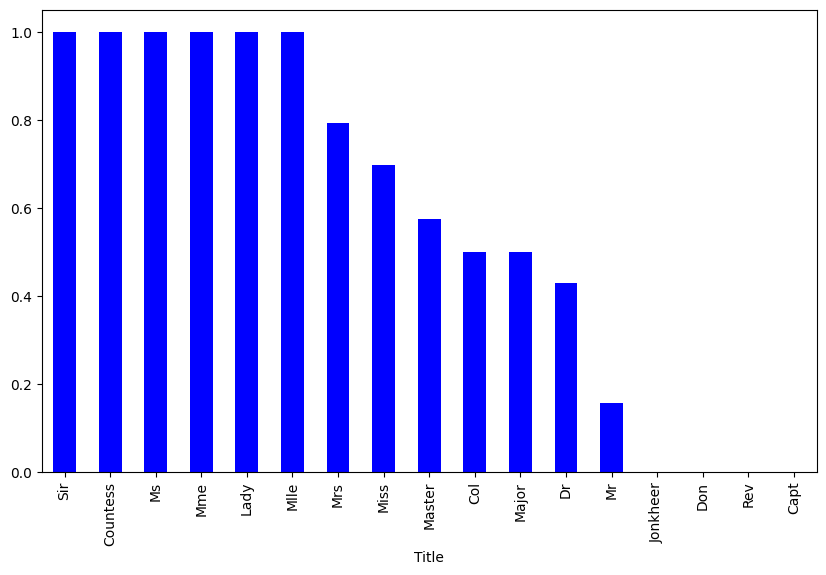

In [709]:
# Name의 PreFix (Title)에 따른 생존율 계산
title_survival_rate = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)
print("생존율이 높은 순서:")
print(title_survival_rate)

# 그래프 그리기
plt.figure(figsize=(10, 6))
title_survival_rate.plot(kind='bar', color='b')

In [710]:
def Title_G(x):
  if x=="Sir" or x=="Countess" or x=="Ms" or x=="Mme" or x=="Lady" or x=="Mlle":
    return 7
  elif x=="Mrs": return 6
  elif x=="Miss": return 5
  elif x=="Master": return 4
  elif x=="Col" or x=="Major": return 3
  elif x=="Dr":  return 2
  elif x=="Mr":  return 1
  else: return 0
df['Title'] = df['Title'].transform(Title_G)

In [711]:
df.drop('Name',axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsCabin,Title
0,0,3,0,22.0,1,0,7.2500,N,0.0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1.0,1,6
2,1,3,1,26.0,0,0,7.9250,N,0.0,0,5
3,1,1,1,35.0,1,0,53.1000,C,0.0,1,6
4,0,3,0,35.0,0,0,8.0500,N,0.0,0,1


5. Parameter SibSP, Parch

<Axes: xlabel='Family_size'>

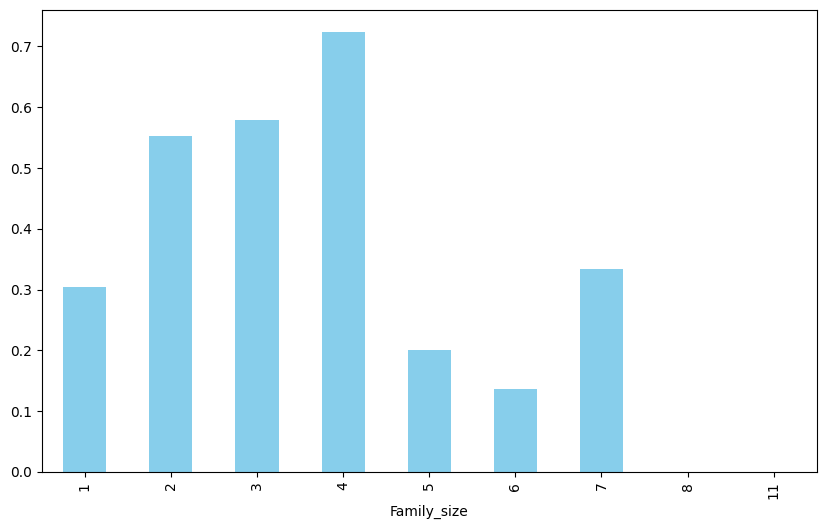

In [712]:
## sibsp와 parch 합쳐서 가족 규모 변수 생성
df['Family_size']=df['SibSp'] + df['Parch'] + 1       # +1: 자기 자신 포함
df.drop(columns=['SibSp', 'Parch'], inplace=True)
# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('Family_size')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')

<Axes: xlabel='CompactFmly'>

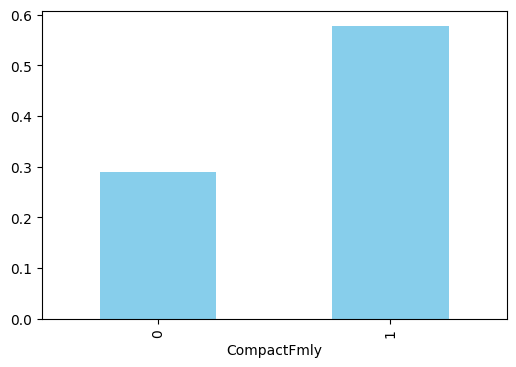

In [713]:
df['CompactFmly'] = 1
df.loc[df['Family_size'] >= 5, 'CompactFmly'] = 0
df.loc[df['Family_size'] == 1, 'CompactFmly'] = 0
compactF_survival_rate = df.groupby('CompactFmly')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(6, 4))
compactF_survival_rate.plot(kind='bar', color='skyblue')

In [714]:
df['IsAlone'] = 1
df.loc[df['Family_size'] > 1, 'IsAlone'] = 0

6. Parameter: Fare

<Axes: xlabel='Fare'>

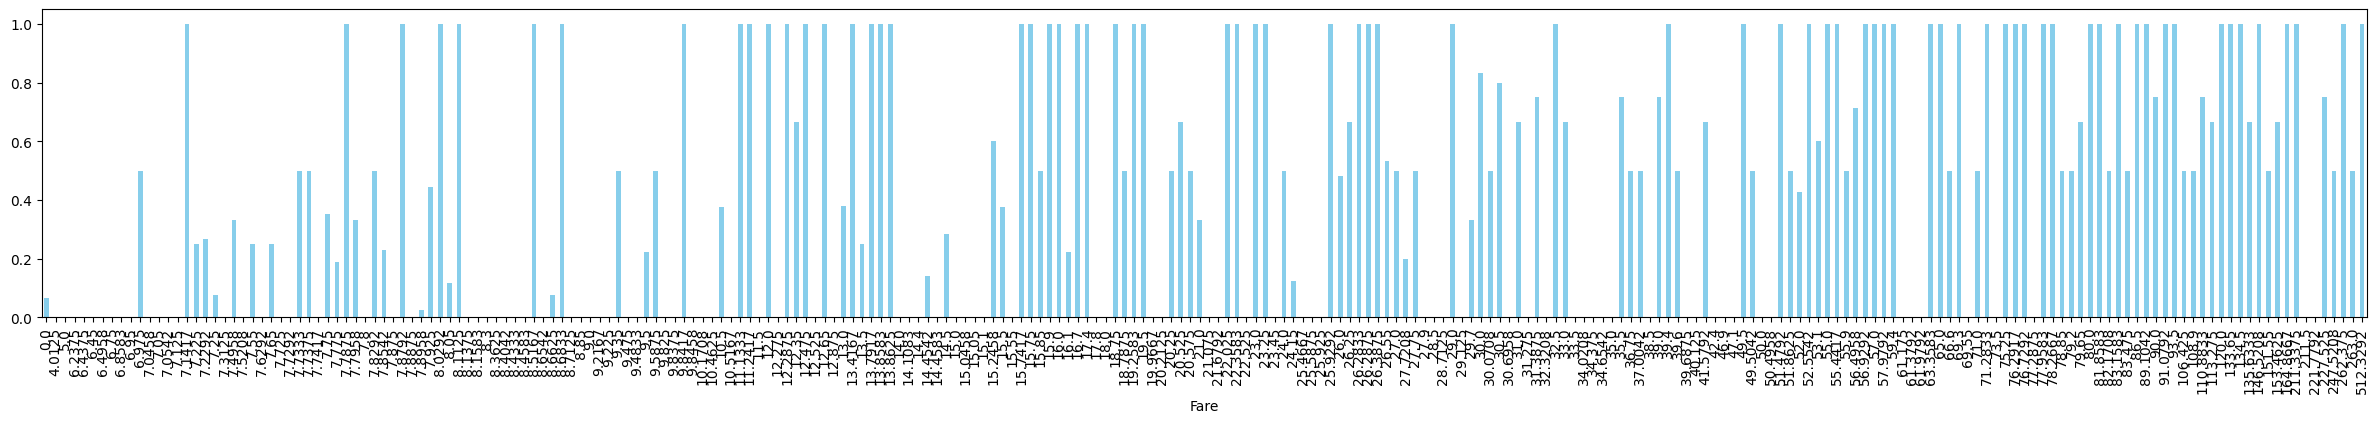

In [715]:
# Fair별 생존율 계산
Fare_survival_rate = df.groupby('Fare')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(30, 4))
Fare_survival_rate.plot(kind='bar', color='skyblue')

In [716]:
## fare를 3개 범주로
bins=[0,30,100,600]
labels=['Low', 'Medium', 'High']
df['Fare_group']=pd.cut(df['Fare'], bins=bins, labels=labels)

7. Parameter: PClass

<Axes: xlabel='Pclass'>

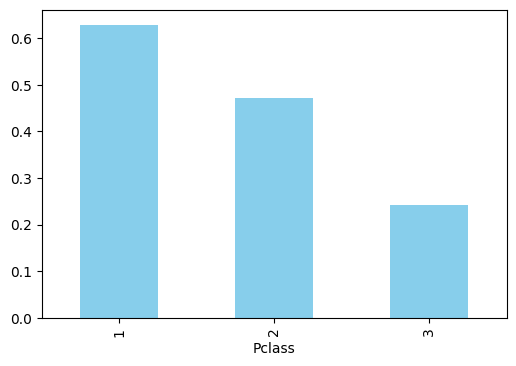

In [717]:
# class별 생존율 계산
class_survival_rate = df.groupby('Pclass')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(6, 4))
class_survival_rate.plot(kind='bar', color='skyblue')

In [718]:
# gender와 pclass 조합 열 추가
# Gender와 Class의 6개 범주로
df['Gender_Class'] = df['Sex'].astype(str) + '-' + df['Pclass'].astype(str)

In [719]:
unique_Gender_Class_values = df['Gender_Class'].unique()
print(unique_Gender_Class_values)

['0-3' '1-1' '1-3' '0-1' '1-2' '0-2']


<Axes: xlabel='Gender_Class'>

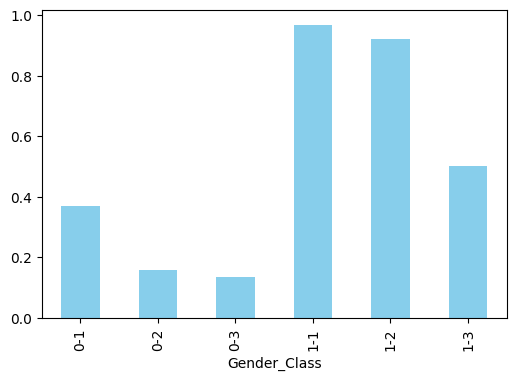

In [720]:
# 성별/클래스 별 생존율 계산
G_C_survival_rate = df.groupby('Gender_Class')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(6, 4))
G_C_survival_rate.plot(kind='bar', color='skyblue')

In [721]:
def Gender_Class_G(x):
  if x=="1-1": return 6
  elif x=="1-2": return 5
  elif x=="1-3": return 4
  elif x=="0-1": return 3
  elif x=="0-2": return 2
  elif x=="0-3":  return 1
df['Gender_Class'] = df['Gender_Class'].transform(Gender_Class_G)

8. Parameter: Age

<Axes: xlabel='Age'>

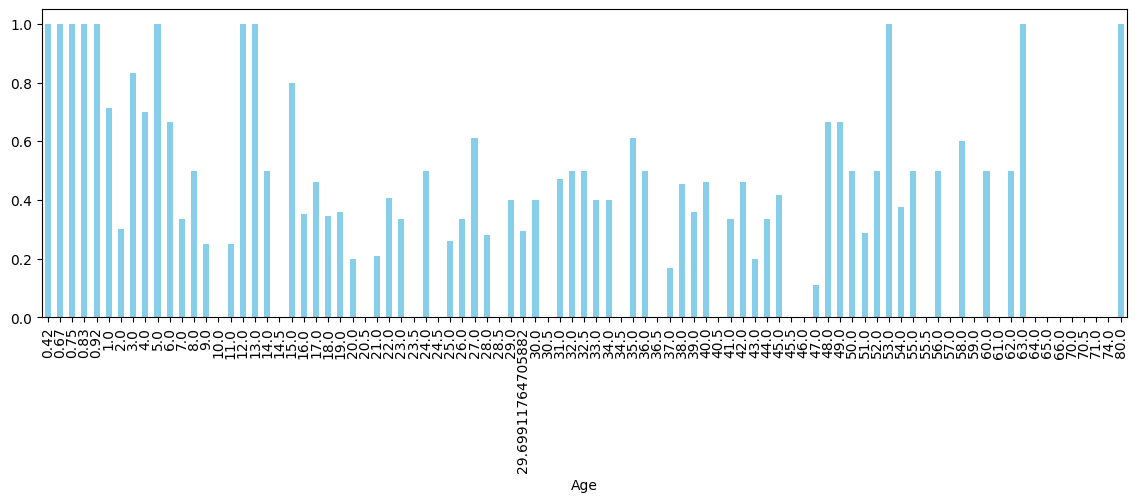

In [722]:
# Age별 생존율 계산
Age_survival_rate = df.groupby('Age')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 4))
Age_survival_rate.plot(kind='bar', color='skyblue')

In [723]:
## age를 8개의 범주로
bins=[0, 1, 5, 6, 12, 16, 48, 63,100]
labels=['Ebaby','Baby', 'Child', 'Teenager', 'Junior', 'Young Adult', 'Adult', 'Senior']
df['Age_group']=pd.cut(df['Age'], bins=bins, labels=labels)

In [724]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    int64   
 3   Age           891 non-null    float64 
 4   Fare          891 non-null    float64 
 5   Cabin         891 non-null    object  
 6   Embarked      891 non-null    float64 
 7   IsCabin       891 non-null    int64   
 8   Title         891 non-null    int64   
 9   Family_size   891 non-null    int64   
 10  CompactFmly   891 non-null    int64   
 11  IsAlone       891 non-null    int64   
 12  Fare_group    876 non-null    category
 13  Gender_Class  891 non-null    int64   
 14  Age_group     891 non-null    category
dtypes: category(2), float64(3), int64(9), object(1)
memory usage: 92.8+ KB
None


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,IsCabin,Title,Family_size,CompactFmly,IsAlone,Fare_group,Gender_Class,Age_group
0,0,3,0,22.000000,7.2500,N,0.0,0,1,2,1,0,Low,1,Young Adult
1,1,1,1,38.000000,71.2833,C,1.0,1,6,2,1,0,Medium,6,Young Adult
2,1,3,1,26.000000,7.9250,N,0.0,0,5,1,0,1,Low,4,Young Adult
3,1,1,1,35.000000,53.1000,C,0.0,1,6,2,1,0,Medium,6,Young Adult
4,0,3,0,35.000000,8.0500,N,0.0,0,1,1,0,1,Low,1,Young Adult
5,0,3,0,29.699118,8.4583,N,0.5,0,1,1,0,1,Low,1,Young Adult
6,0,1,0,54.000000,51.8625,E,0.0,1,1,1,0,1,Medium,3,Adult
7,0,3,0,2.000000,21.0750,N,0.0,0,4,5,0,0,Low,1,Baby
8,1,3,1,27.000000,11.1333,N,0.0,0,6,3,1,0,Low,4,Young Adult
9,1,2,1,14.000000,30.0708,N,1.0,0,6,2,1,0,Medium,5,Junior


In [725]:
df2=df.copy()
df2.drop(columns=['Cabin', 'Fare_group', 'Age_group'], axis=1, inplace=True)

In [726]:
df_cor=df2.corr()
print(df_cor)

              Survived    Pclass       Sex       Age      Fare  Embarked  \
Survived      1.000000 -0.338481  0.543351 -0.069809  0.257307  0.167675   
Pclass       -0.338481  1.000000 -0.131900 -0.331339 -0.549500 -0.162098   
Sex           0.543351 -0.131900  1.000000 -0.084153  0.182333  0.108262   
Age          -0.069809 -0.331339 -0.084153  1.000000  0.091566  0.026749   
Fare          0.257307 -0.549500  0.182333  0.091566  1.000000  0.224719   
Embarked      0.167675 -0.162098  0.108262  0.026749  0.224719  1.000000   
IsCabin       0.319572 -0.722607  0.142608  0.230376  0.482732  0.162042   
Title         0.579014 -0.135780  0.937048 -0.150833  0.189523  0.108660   
Family_size   0.016639  0.065997  0.200988 -0.248512  0.217138 -0.066516   
CompactFmly   0.279855 -0.223551  0.260747 -0.076160  0.205527  0.125896   
IsAlone      -0.203367  0.135207 -0.303646  0.179775 -0.271832 -0.063532   
Gender_Class  0.606044 -0.584971  0.881126  0.089211  0.411324  0.165909   

           

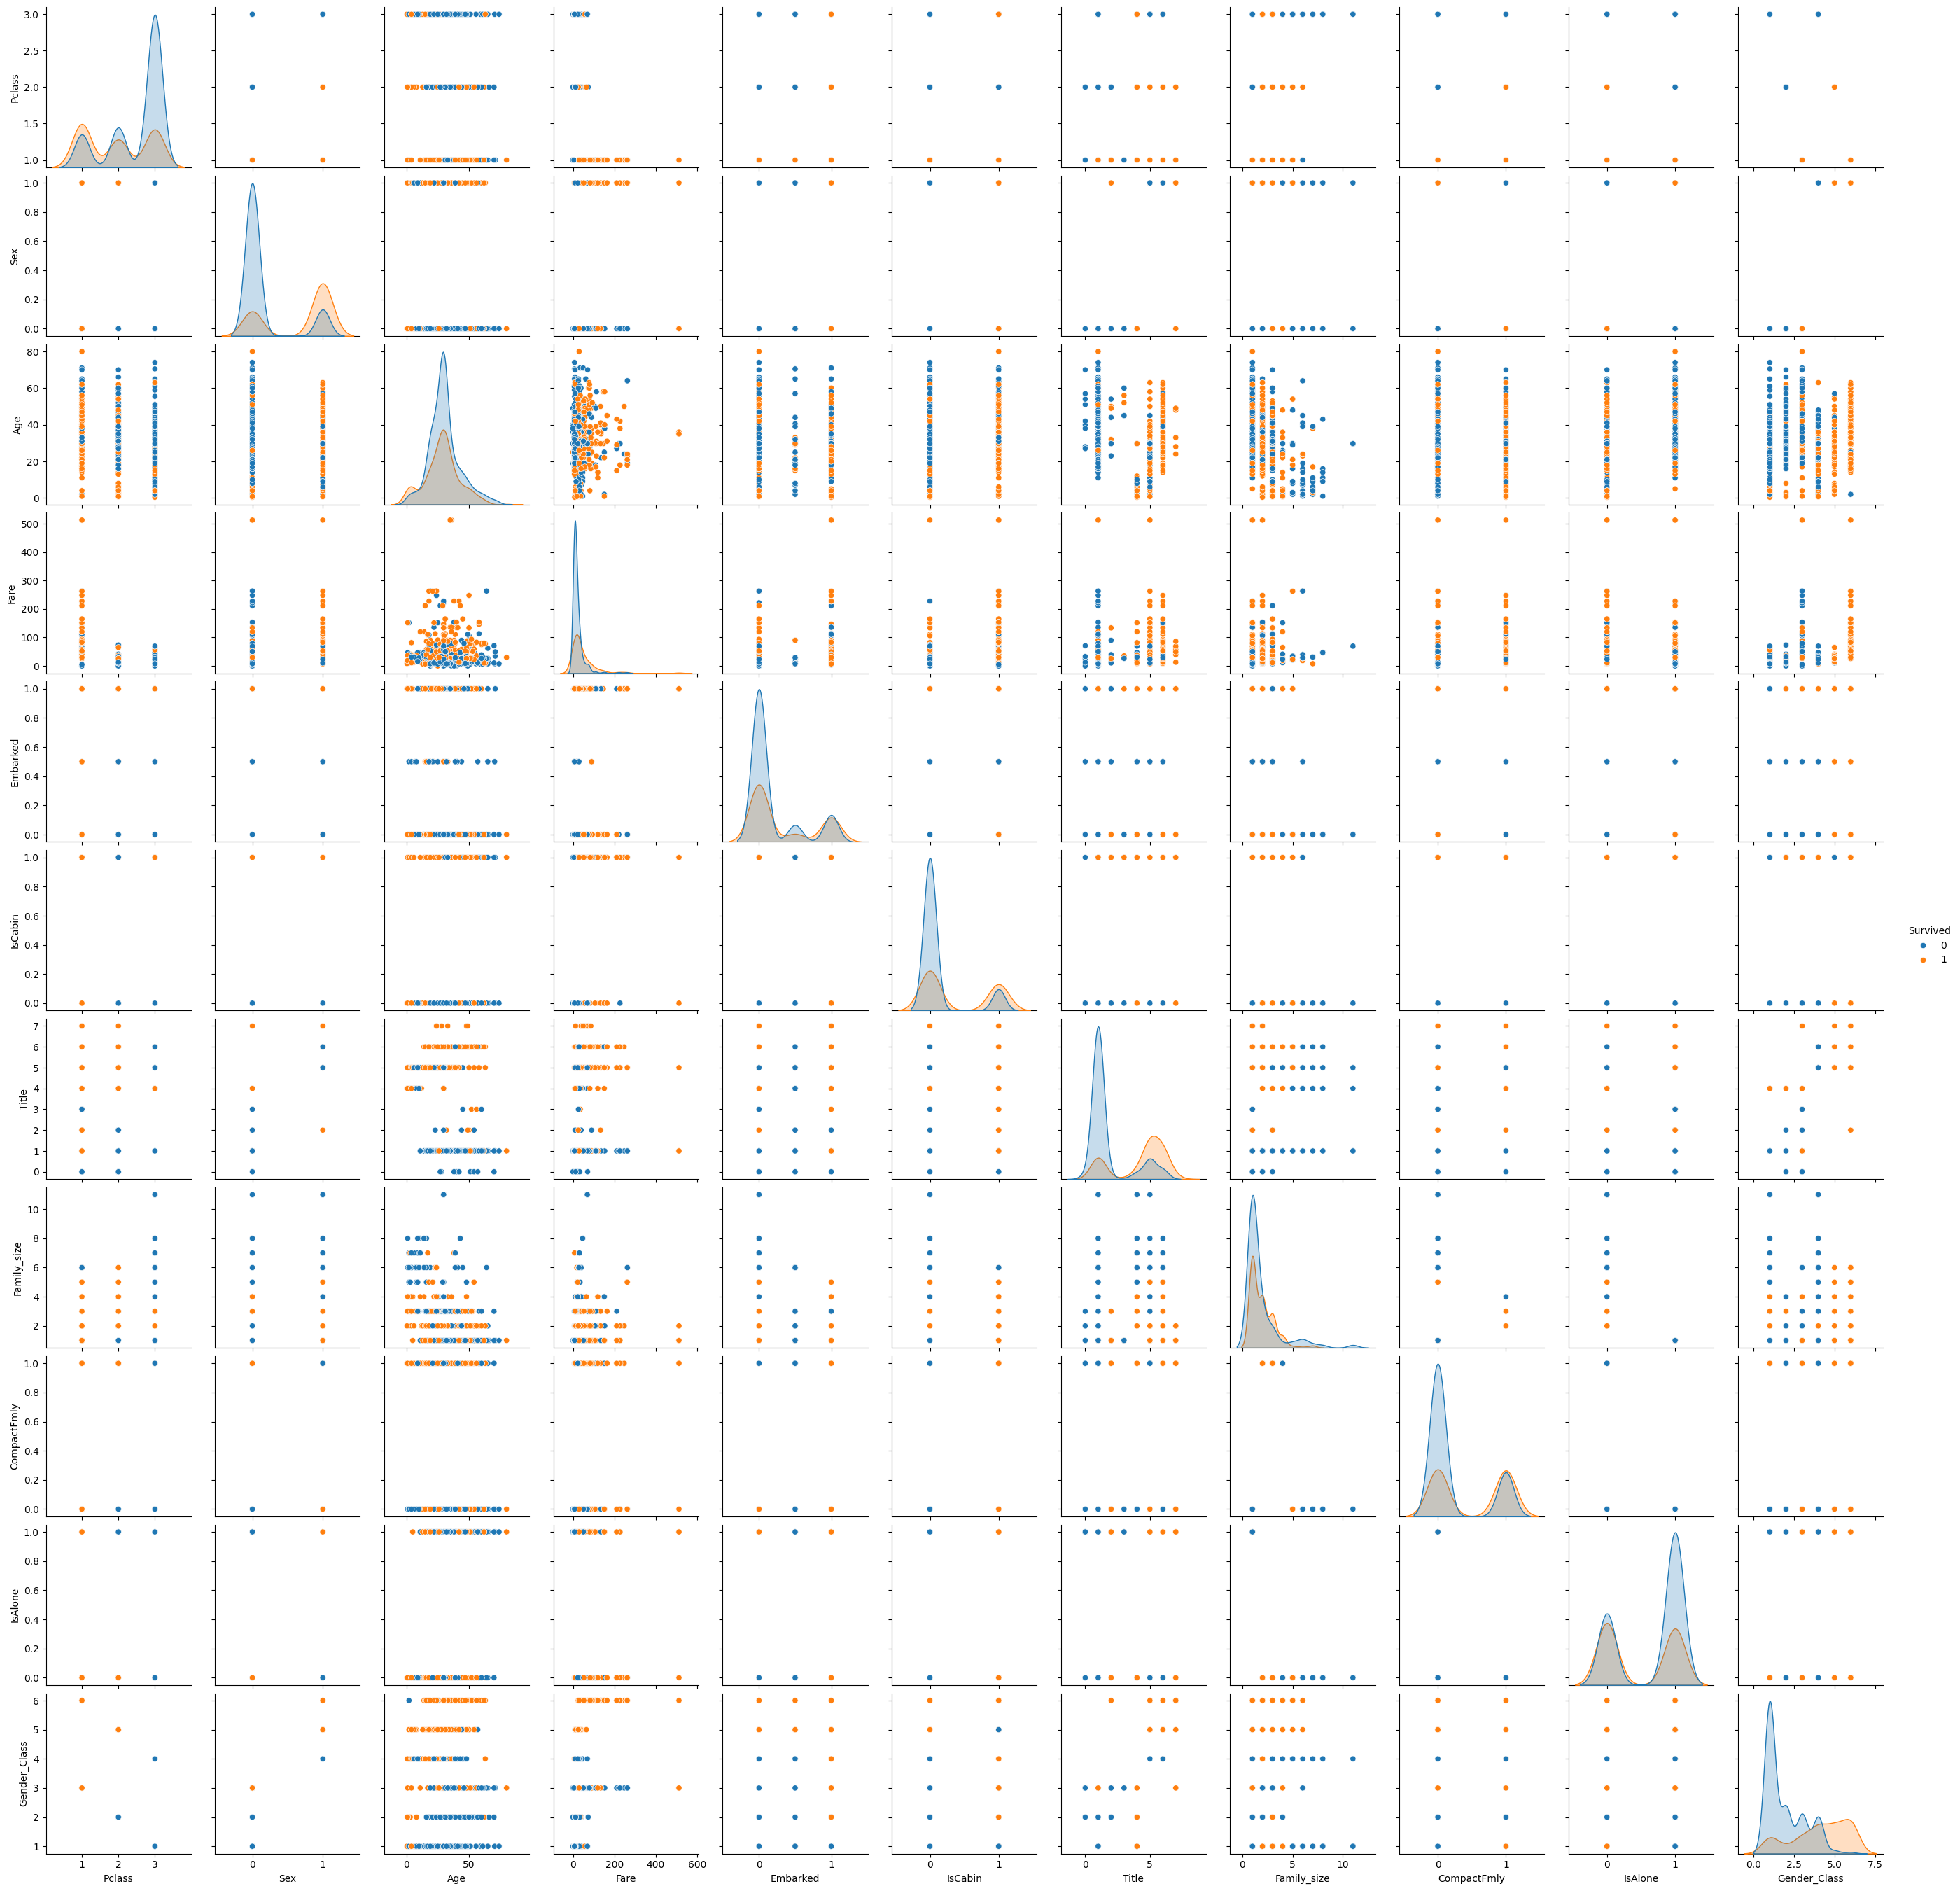

In [727]:
import seaborn as sns
sns.pairplot(df2, hue='Survived')

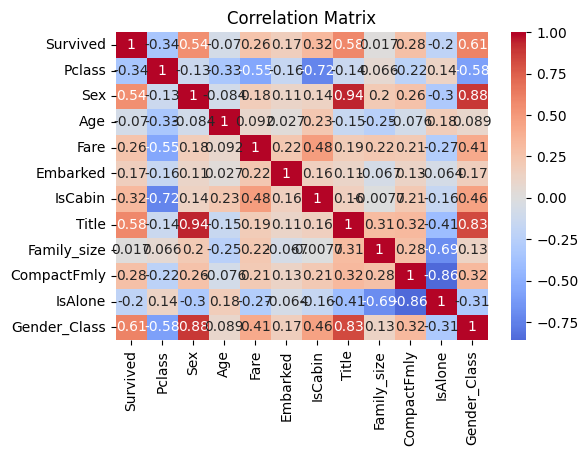

In [728]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [729]:
### 최종 Parameter Set
df.drop(columns=['Age','Cabin', 'Fare', 'CompactFmly', 'IsCabin'], axis=1, inplace=True)
#df.drop(columns=['Age','Cabin', 'Fare', 'CompactFmly', 'IsCabin'], axis=1, inplace=True)

In [730]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 범주형 변수를 더미 변수로 변환할 열 목록
#categorical_columns=['Gender_Class', 'Fare_group', 'Age_group', 'Cabin']
categorical_columns=['Gender_Class', 'Fare_group', 'Age_group']

# 반복문을 사용하여 범주형 변수를 더미 변수로 변환
for column in categorical_columns:
  # 첫 번째 카테고리는 drop_first=True로 제거
  df=pd.get_dummies(df, columns=[column])
df.head()
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 'Family_size',
       'IsAlone', 'Gender_Class_1', 'Gender_Class_2', 'Gender_Class_3',
       'Gender_Class_4', 'Gender_Class_5', 'Gender_Class_6', 'Fare_group_Low',
       'Fare_group_Medium', 'Fare_group_High', 'Age_group_Ebaby',
       'Age_group_Baby', 'Age_group_Child', 'Age_group_Teenager',
       'Age_group_Junior', 'Age_group_Young Adult', 'Age_group_Adult',
       'Age_group_Senior'],
      dtype='object')

In [731]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


# 타겟 변수와 피처 변수 설정
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# 랜덤 포레스트 모델 학습/예측/평가
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# DecisionTreeClassifier 학습/예측/평가
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)
y_DT_pred = model_DT.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_DT_pred))


# LogisticRegression 학습/예측/평가
#model_LR = LogisticRegression(solver='newton-cg')
#model_LR = LogisticRegression(solver='liblinear')
model_LR = LogisticRegression(solver='saga')
model_LR.fit(X_train, y_train)
y_LR_pred = model_LR.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_LR_pred))


# Gradient Boosting Classifier 모델 학습/예측/평가
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train, y_train)
y_GB_pred = model_GB.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_GB_pred))



# # 클래스 가중치 설정
# class_weights = {'Gender_Class_0-2': 1, 'Gender_Class_0-3': 1, 'Gender_Class_1-1': 1, 'Gender_Class_1-2': 2, 'Gender_Class_1-3': 2}

# # 랜덤 포레스트 모델 학습
# model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
# model.fit(X_train, y_train)


# 예측
#y_pred = model.predict(X_test)

# 성능 평가
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


(712, 23) (179, 23) (712,) (179,)
Accuracy: 0.8547486033519553
Accuracy: 0.8268156424581006
Accuracy: 0.8044692737430168


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8212290502793296
